In [21]:
import numpy as np
import tensorflow as tf
from sopt.optimizers.tensorflow.utils import BackTrackingLineSearch
import matplotlib.pyplot as plt

In [11]:
tf.reset_default_graph()

In [12]:
lossfn = lambda x: tf.reduce_sum((x - 2)**2) 
def obj_and_upd_fn(x, y): 
    fnval = lossfn(x + y)
    return fnval, x + y

In [22]:
v1 = tf.Variable(np.random.randn(100).astype('float32') * 20)
steps = tf.Variable(0, dtype='int32')

In [23]:
loss_t = lossfn(v1)
mean_v = tf.reduce_mean(v1)

In [24]:
grad = tf.gradients(loss_t, v1)[0]

In [25]:
b = BackTrackingLineSearch()

In [26]:
linesearch_out = b.search(obj_and_upd_fn, v1, -grad, grad)

In [27]:
assign_ops  = tf.group([v1.assign(linesearch_out.newx), steps.assign_add(linesearch_out.step_count)])

In [34]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [35]:
linesearch_steps = []
lossvals = []
meanvals = []
for i in range(10):
    step, loss, mean = sess.run([steps, loss_t, mean_v])
    linesearch_steps.append(step)
    lossvals.append(loss)
    meanvals.append(mean)
    sess.run(assign_ops)

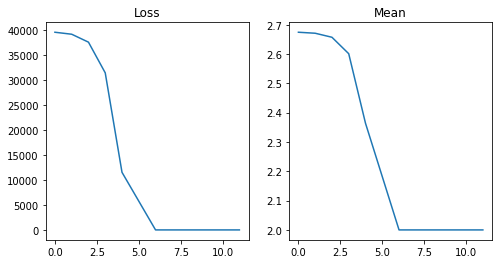

In [37]:
# Final mean should be 2.0

plt.figure(figsize=[8,4])
plt.subplot(1, 2, 1)
plt.plot(linesearch_steps, lossvals)
plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(linesearch_steps, meanvals)
plt.title('Mean')
plt.show()